# **Empirische Wirtschaftsforschung**

# Heteroskedastie

**Author:** [Anthony Strittmatter](http://www.anthonystrittmatter.com)

Um Heteroskedasstie zu illustrieren verwenden wir nochmals den Datensatz mit Gebrauchtwagen (Vorlesung 9). 

Sie wollen den Zusammenhang zwischen Tachostand und Gebrauchtwagenpreisen untersuchen. Ihnen steht ein Datensatz mit 23,282 gebrauchten VW Golfs zur Verfügung. Alle Gebrauchtwagen haben einen Tachostand von mindestens 10,000 km und maximal 200,000 km.

**Variablenbeschreibung:**
- *final_price*: Transaktionspreis (in 1,000 Euro)
- *mileage*: Tachostand  (in 1,000 km)


## Laden der Daten

In [17]:
############## Laden der Daten ##############

data <- read.csv("used_cars.csv",header=TRUE, sep=",")

print('Data is loaded.')

##############################################

[1] "Data is loaded."


# Deskriptive Statistiken

Zunächst überprüfen Sie ob der Datensatz vollständig ist und ob es irgendwelche Auffälligkeiten in den Daten gibt.

In [18]:
############## Deskriptive Statistiken ##############

library(psych) # load package
describe(data)

######################################################

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
final_price,1,23282,13.16673,4.512105,12.56,12.90325,4.29954,1,57.19,56.19,0.6541416,0.8838048,0.02957121
mileage,2,23282,84.79639,49.630311,81.09,82.16562,61.06681,10,200.00,190.00,0.3231626,-0.8938274,0.32526464


# Scatterplot 

Zunächst stellen wir die Gebrauchtwagenpreise in Abhängigkeit des Tachostandes grafisch dar.

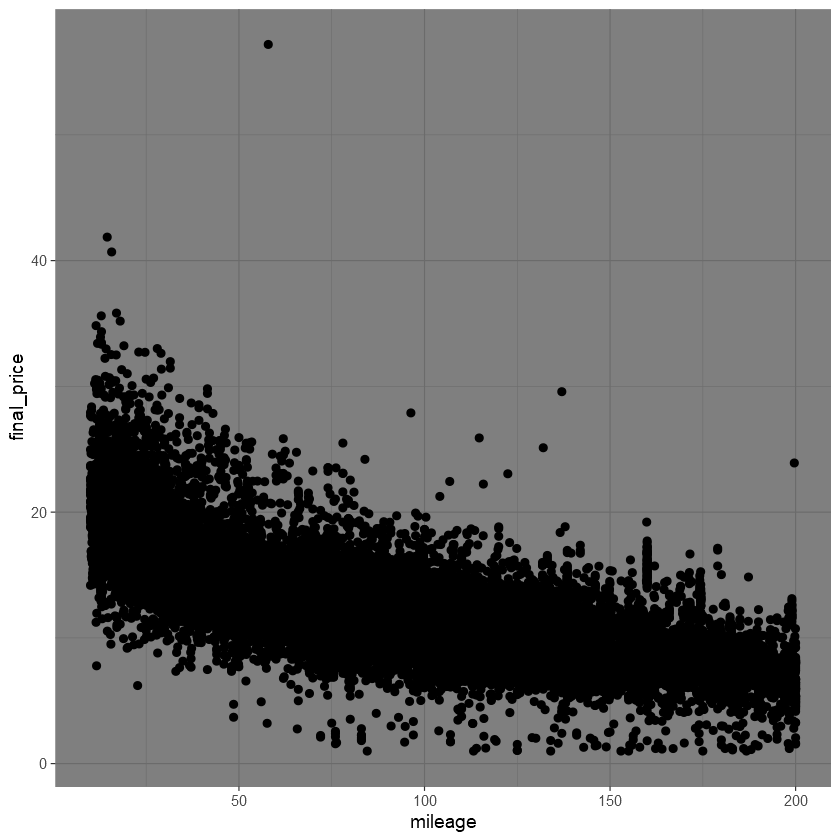

In [20]:
######## Scatterplot ########

library(tidyverse)
ggplot(data, aes(mileage, final_price)) + 
    geom_point() +
    theme_dark()

#############################

# Bivariates Regressionmodell unter Homoskedastie

Wir schätzen ein bivates Regressionsmodell unter der Annahme von Homoskedastie.

In [3]:
##### Regression mit homoskedastischen Standardfehlern ####

homo <- lm(final_price ~ mileage, data)
summary(homo)

#################################################################


Call:
lm(formula = final_price ~ mileage, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.195  -1.881  -0.117   1.705  42.164 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.0291602  0.0380186   500.5   <2e-16 ***
mileage     -0.0691354  0.0003869  -178.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.93 on 23280 degrees of freedom
Multiple R-squared:  0.5783,	Adjusted R-squared:  0.5783 
F-statistic: 3.192e+04 on 1 and 23280 DF,  p-value: < 2.2e-16


# Breusch-Pagan Test

Wir überprüfen ob die Homoskedastieannahme plausibel ist.

In [14]:
######## Breusch-Pagan Test #########

u_hat <- (homo$residuals)^2

auxiliary1 <- lm(u_hat ~ 1, data)
auxiliary2 <- lm(u_hat ~ mileage, data)
summary(auxiliary2)

anova(auxiliary1,auxiliary2)

######################################


Call:
lm(formula = u_hat ~ mileage, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -11.74   -7.48   -4.66    0.85 1768.05 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.211458   0.273769   44.60   <2e-16 ***
mileage     -0.042761   0.002786  -15.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.1 on 23280 degrees of freedom
Multiple R-squared:  0.01001,	Adjusted R-squared:  0.009972 
F-statistic: 235.5 on 1 and 23280 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
23281,10469712,NA,NA,NA,NA
23280,10364858,1,104854,235.5075,6.814373e-53


Wir müssen die Nullhypothese von homoskedastischen Standardfehlern verwerfen.

# Bivariates Regressionmodell unter Heteroskedastie

In [15]:
##### Regression mit heteroskedastierobusten Standardfehlern ####

library(sandwich)
hetero <- coeftest(homo, vcov = vcovHC(homo))
print(hetero)

#################################################################


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept) 19.02916021  0.04304099  442.12 < 2.2e-16 ***
mileage     -0.06913543  0.00040376 -171.23 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

